<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating SVM on Multiple Datasets

_Authors: Kiefer Katovich (SF)_

---

In this lab you can explore several datasets with SVM classifiers compared to logistic regression and kNN classifiers. 

Your datasets folder has these four datasets to choose from for the lab:

**Breast cancer**

    ./datasets/breast_cancer_wisconsin

**Spambase**

    ./datasets/spam

**Car evaluation**

    ./datasets/car_evaluation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Binarizer, Imputer, \
    OneHotEncoder, PolynomialFeatures, StandardScaler, \
    MinMaxScaler, RobustScaler

In [3]:
from scipy.stats import mode

### 1. Load the breast cancer data

- Are there any missing values? Impute or clean if so.
- Select a classification target and predictors.

In [4]:
pwd

'C:\\Users\\Mark\\Desktop\\GA\\labs\\lab-svm-support_vector_machines'

In [5]:
# A:
df = pd.read_csv('datasets/breast_cancer_wisconsin/breast_cancer.csv')
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

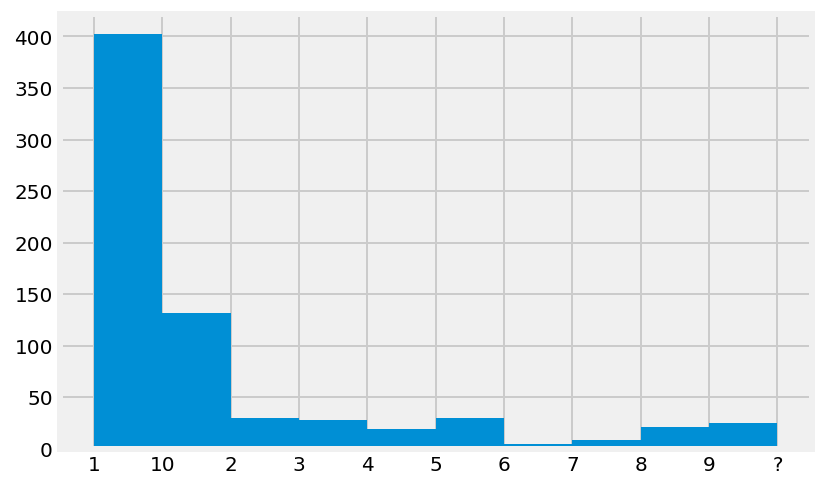

In [7]:
df['Bare_Nuclei'].hist()

In [8]:
df[df['Bare_Nuclei'].isnull()]['Class'].value_counts()

Series([], Name: Class, dtype: int64)

In [9]:
df['Class'].unique()

array([2, 4], dtype=int64)

In [10]:
df['Class'].isnull().sum()

0

In [11]:
df['Bare_Nuclei'].dropna(inplace=True)

In [12]:
df[df['Bare_Nuclei'].isnull()]['Class'].value_counts()

Series([], Name: Class, dtype: int64)

In [13]:
df['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object)

In [14]:
df = df[df['Bare_Nuclei'] != '?']

In [15]:
df['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [16]:
df.shape

(683, 11)

In [17]:
df.columns

Index(['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [18]:
X = df.drop(['Sample_code_number', 'Class'], axis=1)

In [19]:
X.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [20]:
def cls(num):
    if num == 2:
        return 0
    else:
        return 1

In [21]:
y = df['Class'].apply(cls)

In [22]:
X.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [24]:
ss = StandardScaler()
Xs = ss.fit_transform(X)


### 2. Build an SVM classifier on the data

For details on the SVM classifier, see here:

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- What's the baseline for the accuracy?
- Initialize and train a linear svm. What's the average accuracy score with a 5-fold cross validation?
- Repeat using a radial basis function (rbf) classifier. Compare the scores. Which one is better?
- Print a confusion matrix and classification report for your best model using training & testing data.

Classification report:

```python
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
```

Confusion matrix:

```python
df_confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
```

In [25]:
y.mean() #baseline accuracy is 35%

0.34992679355783307

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score



In [27]:
svm = SVC(kernel='linear')
svm_score = cross_val_score(svm, Xs, y, cv=5)

In [28]:
svm_score.mean() # svm model predits 96%

0.96783995674506618

In [29]:
svm = SVC(kernel='rbf')
svm_score = cross_val_score(svm, Xs, y, cv=5).mean()

In [30]:
svm_score # the linear model worked better

0.96492024871586912

In [31]:
from sklearn.metrics import classification_report
svm.fit(Xs, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
svm_predict = svm.predict(Xs)

In [33]:
df_confusion = pd.crosstab(y, svm_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)
print('_______________________________________________________')
print(classification_report(y, svm_predict))

Predicted    0    1  All
Actual                  
0          433   11  444
1            5  234  239
All        438  245  683
_______________________________________________________
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       444
          1       0.96      0.98      0.97       239

avg / total       0.98      0.98      0.98       683



#### 2.2 Are there more false positives or false negatives? Is this good or bad?


In [34]:
# A:There are more false negatives than false positives meaning 
# the cancer wasn't predicted when there was cancer

### 3. Perform the steps above with a different dataset.

Repeat each step.

In [35]:
cars = pd.read_csv('./datasets/car_evaluation/car.csv')

In [36]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [37]:
cars['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [38]:
cars.isnull().sum()

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

In [39]:
cars.shape

(1728, 7)

In [40]:
cars.dtypes

buying           object
maint            object
doors            object
persons          object
lug_boot         object
safety           object
acceptability    object
dtype: object

In [41]:
X.shape

(683, 9)

In [42]:
cars[['buying']].items

<bound method DataFrame.iteritems of      buying
0     vhigh
1     vhigh
2     vhigh
3     vhigh
4     vhigh
5     vhigh
6     vhigh
7     vhigh
8     vhigh
9     vhigh
10    vhigh
11    vhigh
12    vhigh
13    vhigh
14    vhigh
15    vhigh
16    vhigh
17    vhigh
18    vhigh
19    vhigh
20    vhigh
21    vhigh
22    vhigh
23    vhigh
24    vhigh
25    vhigh
26    vhigh
27    vhigh
28    vhigh
29    vhigh
...     ...
1698    low
1699    low
1700    low
1701    low
1702    low
1703    low
1704    low
1705    low
1706    low
1707    low
1708    low
1709    low
1710    low
1711    low
1712    low
1713    low
1714    low
1715    low
1716    low
1717    low
1718    low
1719    low
1720    low
1721    low
1722    low
1723    low
1724    low
1725    low
1726    low
1727    low

[1728 rows x 1 columns]>

In [43]:
for k,v in cars['buying'].items():
    if v == 'vhigh':
        cars.set_value(k, 'buying', 3)
    elif v == 'high':
        cars.set_value(k, 'buying', 2)
    elif v == 'med':
        cars.set_value(k, 'buying', 1)
    else:
        cars.set_value(k, 'buying', 0)

In [44]:
cars['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [45]:
cars['buying'].unique()

array([3, 2, 1, 0], dtype=object)

In [46]:
for k,v in cars.iteritems():
    print(k, ':',  v.unique())

buying : [3 2 1 0]
maint : ['vhigh' 'high' 'med' 'low']
doors : ['2' '3' '4' '5more']
persons : ['2' '4' 'more']
lug_boot : ['small' 'med' 'big']
safety : ['low' 'med' 'high']
acceptability : ['unacc' 'acc' 'vgood' 'good']


In [47]:
for k,v in cars['maint'].items():
    if v == 'vhigh':
        cars.set_value(k, 'maint', 3)
    elif v == 'high':
        cars.set_value(k, 'maint', 2)
    elif v == 'med':
        cars.set_value(k, 'maint', 1)
    else:
        cars.set_value(k, 'maint', 0)

In [48]:
for k,v in cars['doors'].items():
    if v == '2':
        cars.set_value(k, 'doors', 3)
    elif v == '3':
        cars.set_value(k, 'doors', 2)
    elif v == '4':
        cars.set_value(k, 'doors', 1)
    else:
        cars.set_value(k, 'doors', 0)

In [49]:
for k,v in cars['persons'].items():
    if v == '2':
        cars.set_value(k, 'persons', 2)
    elif v == '4':
        cars.set_value(k, 'persons', 1)
    else:
        cars.set_value(k, 'persons', 0)

In [50]:
for k,v in cars['lug_boot'].items():
    if v == 'small':
        cars.set_value(k, 'lug_boot', 2)
    elif v == 'med':
        cars.set_value(k, 'lug_boot', 1)
    else:
        cars.set_value(k, 'lug_boot', 0)

In [51]:
for k,v in cars['safety'].items():
    if v == 'small':
        cars.set_value(k, 'safety', 2)
    elif v == 'med':
        cars.set_value(k, 'safety', 1)
    else:
        cars.set_value(k, 'safety', 0)

In [52]:
for k,v in cars.iteritems():
    print(k, ':',  v.unique())

buying : [3 2 1 0]
maint : [3 2 1 0]
doors : [3 2 1 0]
persons : [2 1 0]
lug_boot : [2 1 0]
safety : [0 1]
acceptability : ['unacc' 'acc' 'vgood' 'good']


In [53]:
X = [x for x in cars if x != 'acceptability']
X = pd.DataFrame(cars, columns=X)

In [54]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,3,2,2,0
1,3,3,3,2,2,1
2,3,3,3,2,2,0
3,3,3,3,2,1,0
4,3,3,3,2,1,1


In [55]:
y = cars['acceptability'].map(lambda x: 1 if x in ['vgood', 'good'] else 0)

In [56]:
y.mean()

0.0775462962962963

In [57]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [58]:
svml = SVC(kernel='linear')

In [59]:
svml_score = cross_val_score(svml, Xs, y, cv=5)

In [60]:
svml_score.mean() # score with linear kernel, trying next with rbf kernel

0.82943271945153918

In [61]:
svmr = SVC(kernel='rbf')
score_rbf = cross_val_score(svmr, Xs, y, cv=5)
st = score_rbf.std()
print(score_rbf.mean()) # linear was a better score
print(st)
print('{:0.3} -- {:0.3}'.format(score_rbf.mean(), st))


0.817908993144
0.167619802875
0.818 -- 0.168


In [62]:
from sklearn.model_selection import cross_val_predict
lin_predict = cross_val_predict(svml, Xs, y, cv=5)

In [63]:
rbf_predict = cross_val_predict(svmr, Xs, y, cv=5)

In [64]:
class_rbf = classification_report(y, rbf_predict)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
print('linear:' '\n' ,confusion_matrix(y, lin_predict))
print('rbf:', '\n', confusion_matrix(y, rbf_predict))

linear:
 [[1408  186]
 [ 108   26]]
rbf: 
 [[1368  226]
 [  88   46]]


In [67]:
df_confusion_rbf = pd.crosstab(y, rbf_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion_rbf)
print('-----------------------------------------------')
print(classification_report(y, rbf_predict))

Predicted     0    1   All
Actual                    
0          1368  226  1594
1            88   46   134
All        1456  272  1728
-----------------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.86      0.90      1594
          1       0.17      0.34      0.23       134

avg / total       0.88      0.82      0.85      1728



In [68]:
df_confusion_lin = pd.crosstab(y, lin_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion_lin)
print('___________________________________________')
print(classification_report(y, lin_predict))

Predicted     0    1   All
Actual                    
0          1408  186  1594
1           108   26   134
All        1516  212  1728
___________________________________________
             precision    recall  f1-score   support

          0       0.93      0.88      0.91      1594
          1       0.12      0.19      0.15       134

avg / total       0.87      0.83      0.85      1728



### 4. Compare SVM, kNN and logistic regression using a dataset.

You should:

- Gridsearch optimal parameters for both (for SVM, just gridsearch C and kernel).
- Cross-validate scores.
- Examine confusion matrices and classification reports.

**Bonus:**

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [69]:
# A:
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Looking at KNN model

In [74]:
knn = KNeighborsClassifier()

n_neighbors=[1,3,5,7,9]
weights = ['uniform', 'distance']
knn_params = dict(n_neighbors=n_neighbors, weights=weights)

knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=2)

In [75]:
knn_grid.fit(Xs, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   57.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [78]:
print('knn best estimator:', '\n', knn_grid.best_estimator_)

knn best estimator: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


In [79]:
knn_be = knn_grid.best_estimator_
knn_score = knn_grid.best_score_
knn_bparams = knn_grid.best_params_

In [80]:
print(knn_score)
print(knn_bparams)

0.888310185185
{'n_neighbors': 9, 'weights': 'uniform'}


In [81]:
knn_ypredict = knn_grid.predict(Xs)

In [82]:
knn_ypredict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
cm_knn = confusion_matrix(y, knn_ypredict)
cm_dfknn = pd.DataFrame(cm_knn, columns=('pred_0', 'pred_1'), index=('Actual_0', 'Actual_1'))

In [85]:
cm_dfknn

,pred_0,pred_1
Actual_0,1577,17
Actual_1,85,49


In [86]:
print(classification_report(y, knn_ypredict))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1594
          1       0.74      0.37      0.49       134

avg / total       0.93      0.94      0.93      1728



## Logistic Regression Model

In [88]:
lg = LogisticRegression()
penalty_range = ['l1', 'l2']
C_range = np.logspace(-5,3,10)

In [89]:
param_grid = dict(penalty=penalty_range,C=C_range)

In [90]:
lg_grid = GridSearchCV(lg, param_grid, cv=3, n_jobs=-1)
lg_grid.fit(Xs,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   7.74264e-05,   5.99484e-04,   4.64159e-03,
         3.59381e-02,   2.78256e-01,   2.15443e+00,   1.66810e+01,
         1.29155e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
print('log best estimator:', '\n', lg_grid.best_estimator_)
print('log best params:' '\n', lg_grid.best_params_)
print('log score:', '\n', lg_grid.best_score_)

log best estimator: 
 LogisticRegression(C=1.0000000000000001e-05, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
log best params:
 {'C': 1.0000000000000001e-05, 'penalty': 'l1'}
log score: 
 0.922453703704


In [92]:
log_ypredict = lg_grid.predict(Xs)

In [97]:
print(confusion_matrix(y, log_ypredict))
print('_____________________________________________')
print(classification_report(y, log_ypredict))

[[1594    0]
 [ 134    0]]
_____________________________________________
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      1594
          1       0.00      0.00      0.00       134

avg / total       0.85      0.92      0.89      1728



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [102]:
cm_lg = confusion_matrix(y, log_ypredict)
cm_lg_df = pd.DataFrame(cm_lg,columns=('"pred_0', 'Pred_1'), index=('Actua_0', 'Actual_1'))

In [103]:
cm_lg_df

,"""pred_0",Pred_1
Actua_0,1594,0
Actual_1,134,0


## SVM Model practice

In [105]:

svm = SVC()
C=np.logspace(-3,2,10)
kernel_range = ['linear', 'rbf']
gamma_range = np.logspace(-5,2,10)

param_grid = dict(C=C, kernel=kernel_range, gamma=gamma_range)
gs_svm = GridSearchCV(svm, param_grid, n_jobs=-1, cv=5, verbose=2)

In [106]:
gs_svm.fit(Xs,y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 985 out of 1000 | elapsed:  1.0min remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-03,   3.59381e-03,   1.29155e-02,   4.64159e-02,
         1.66810e-01,   5.99484e-01,   2.15443e+00,   7.74264e+00,
         2.78256e+01,   1.00000e+02]), 'kernel': ['linear', 'rbf'], 'gamma': array([  1.00000e-05,   5.99484e-05,   3.59381e-04,   2.15443e-03,
         1.29155e-02,   7.74264e-02,   4.64159e-01,   2.78256e+00,
         1.66810e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [114]:
print('best svc score:', '\n', gs_svm.best_score_)
print('\n')
print('SVC best estimator:', '\n', '----------------------', '\n', gs_svm.best_estimator_)
print('\n')
print('SVC best params:', '\n' '--------------------', '\n', gs_svm.best_params_)

best svc score: 
 0.923611111111


SVC best estimator: 
 ---------------------- 
 SVC(C=0.59948425031894093, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01291549665014884,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


SVC best params: 
-------------------- 
 {'C': 0.59948425031894093, 'gamma': 0.01291549665014884, 'kernel': 'rbf'}


In [115]:
# classification and confusion matrix

In [116]:
svm_predict = gs_svm.predict(Xs)

In [118]:
print(classification_report(y, svm_predict))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96      1594
          1       0.00      0.00      0.00       134

avg / total       0.85      0.92      0.89      1728



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [122]:
cm_svm = confusion_matrix(y, svm_predict)
cm_svm

array([[1594,    0],
       [ 134,    0]], dtype=int64)

In [124]:
cm_svm_df =pd.DataFrame(cm_svm, index=('Actual_0', 'Actual_1'), columns=('Predict_0', 'Predict_1'))
cm_svm_df

,Predict_0,Predict_1
Actual_0,1594,0
Actual_1,134,0
